In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import src.extreme.period_pattern_extreme as period_ext

In [3]:
import importlib
importlib.reload(period_ext)

<module 'src.extreme.period_pattern_extreme' from '/work/mh0033/m300883/3rdPanel/src/extreme/period_pattern_extreme.py'>

In [4]:
import proplot as pplt

# Data

In [5]:
def read_index(std_type):
    """read index_dynamical_spatial_patterns"""
    odir = '/work/mh0033/m300883/3rdPanel/data/first_last/dep/'
    std = std_type
    fpath_first10_first = odir+std+"/first10_first.nc"
    fpath_last10_last = odir+std+"/last10_last.nc"
    first10_first = xr.open_dataset(fpath_first10_first)
    last10_last = xr.open_dataset(fpath_last10_last)
    first10_first = first10_first.pc
    last10_last = last10_last.pc
    return first10_first, last10_last

In [6]:
def plot_period(first_ec, last_ec,ax):
    """plot vertical profile of two peiods"""
    x_first = first_ec.values
    x_last = last_ec.values
    y = (first_ec.hlayers.values)/100
    first_profile = ax.plot(x_first,y,linestyle  = '-',color = 'k',label = 'first10')
    last_profile = ax.plot(x_last,y, linestyle = '--',color = 'k',label = 'last10')

In [7]:
def plot_diff(diff_ec,ax):
    """
    plot the difference between first10 and last10 years.
    """
    x_diff_pos = diff_ec.sel(extr_type = 'pos').values
    x_diff_neg = diff_ec.sel(extr_type = 'neg').values
    y = (diff_ec.hlayers.values)/100
    diff_pos_profile = ax.plot(x_diff_pos,y,linestyle  = '-',color = 'k',label = 'Positive')
    diff_neg_profile = ax.plot(x_diff_neg,y,linestyle  = '--',color = 'k',label = 'Negative')

## std_self

In [8]:
first_self,last_self = read_index('std_self')

In [9]:
first_self_ec = period_ext.period_extreme_count(first_self,standard = False)
last_self_ec = period_ext.period_extreme_count(last_self,standard = False)


In [10]:
def plot_vertical_profile(first_ec, last_ec,mode,std_type):
    """
    plot the vertical profile of extreme counts
    """
    first_ec = first_ec.sel(mode = mode)
    last_ec = last_ec.sel(mode = mode)
    diff_ec = last_ec - first_ec

    fig = pplt.figure(space = 0, refwidth = "20em")
    axes = fig.subplots(nrows = 1, ncols = 3)
    axes.format(
        abc = 'a',
        abcloc = 'ul',
        xlocator = [0,10,20,30,40],
        xminorticks = 'null',
        yminorticks = 'null',
        suptitle = f"{mode} extreme event counts standardizised with {std_type}"
    )

    titles = ['pos','neg','diff']

    # first 2 cols
    extr_types = ['pos','neg']
    for i,ax in enumerate(axes[:2]):
        first_ext = first_ec.sel(extr_type = extr_types[i])
        last_ext = last_ec.sel(extr_type = extr_types[i])
        plot_period(first_ext, last_ext, ax=ax)
        ax.format(title = titles[i])

    # the last col
    plot_diff(diff_ec, ax = axes[2])
    axes[2].format(title = titles[2])

    for ax in axes[:2]:
        ax.set_ylim(1000,200)
        ax.set_xlim(5,45)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)    
    axes[0].legend(loc = 'lr',ncols = 1,title = 'period')
    axes[1].legend(loc = 'll', ncols = 1,title = 'period')
    axes[2].legend(loc = 'cr', ncols = 1,title = 'extreme type')
    axes[2].set_ylim(1000,200)
    axes[2].set_xlim(-5,35)
    axes[2].spines['right'].set_visible(False)
    axes[2].spines['top'].set_visible(False)    


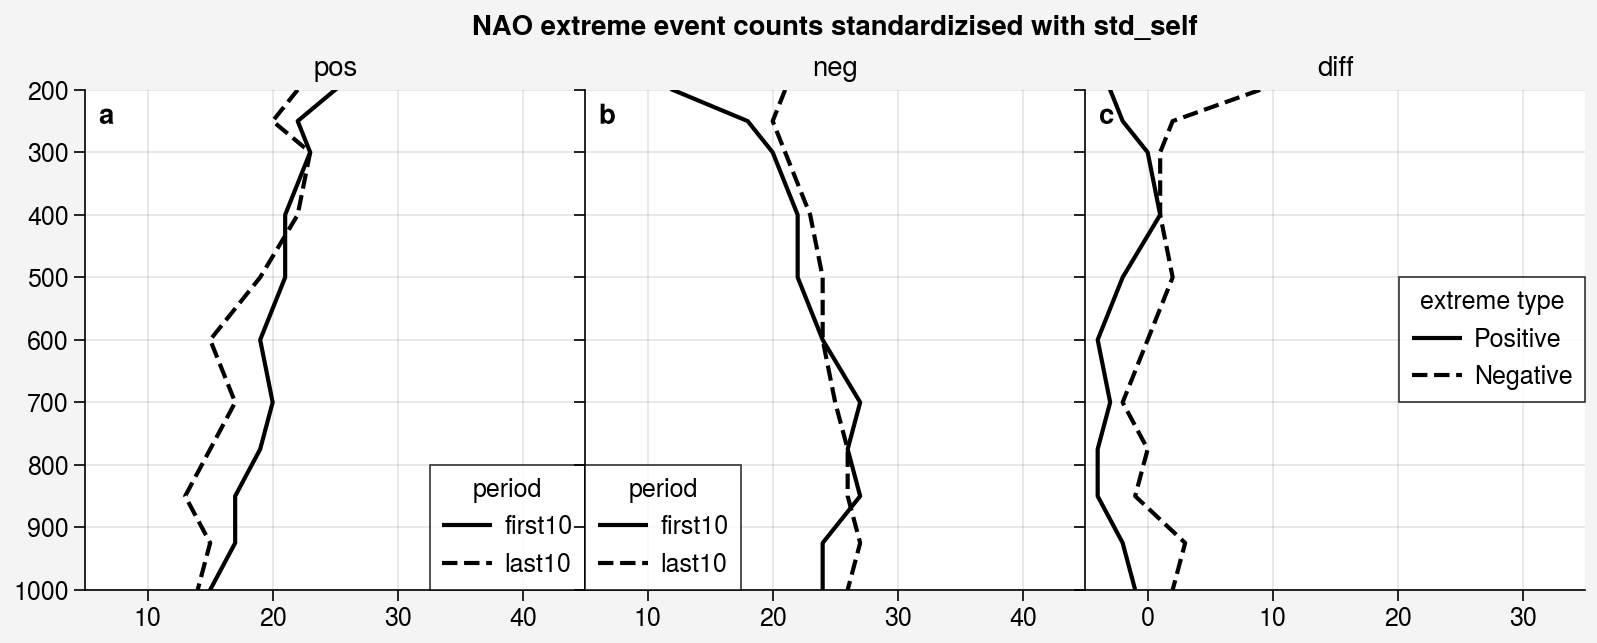

In [11]:
plot_vertical_profile(first_self_ec, last_self_ec,'NAO','std_self')

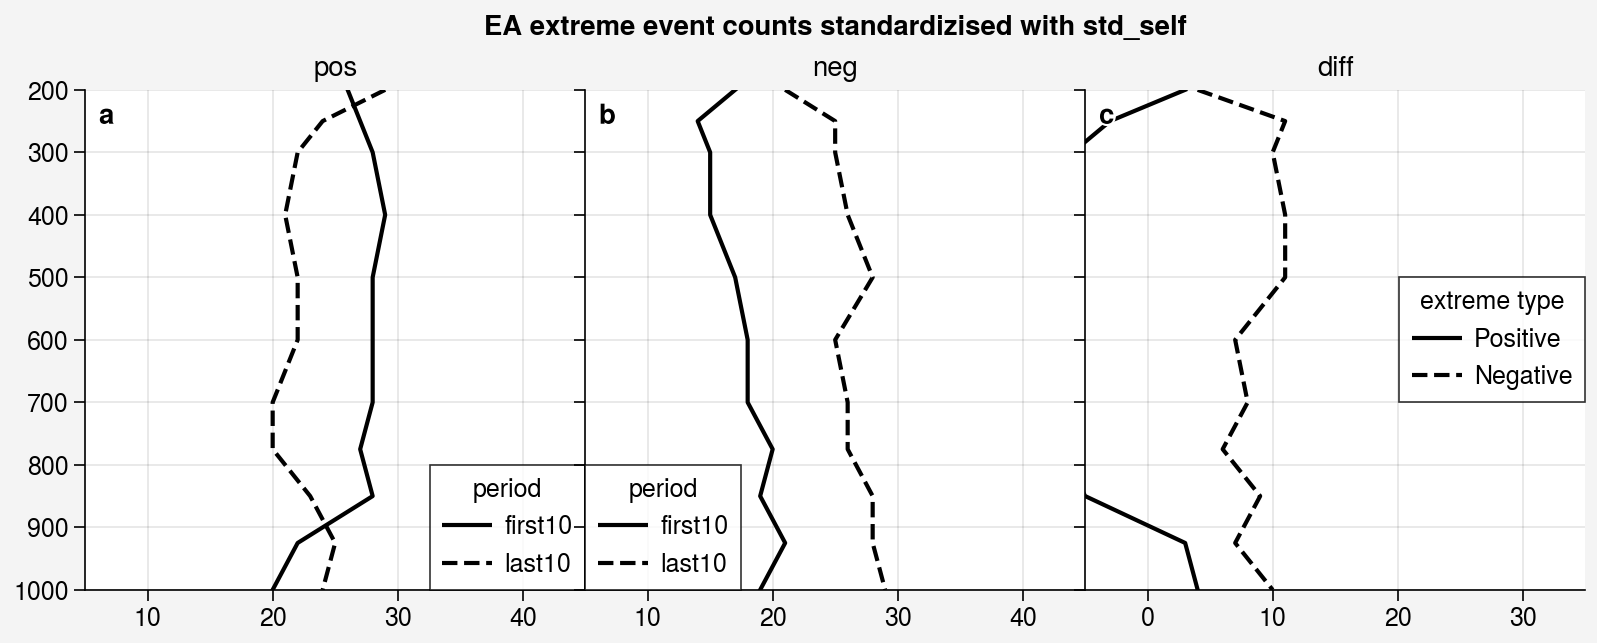

In [12]:
plot_vertical_profile(first_self_ec, last_self_ec,'EA','std_self')

## std_all

In [13]:
first_all,last_all = read_index('std_all')

In [14]:
first_all_ec = period_ext.period_extreme_count(first_all,standard = False)
last_all_ec = period_ext.period_extreme_count(last_all,standard = False)


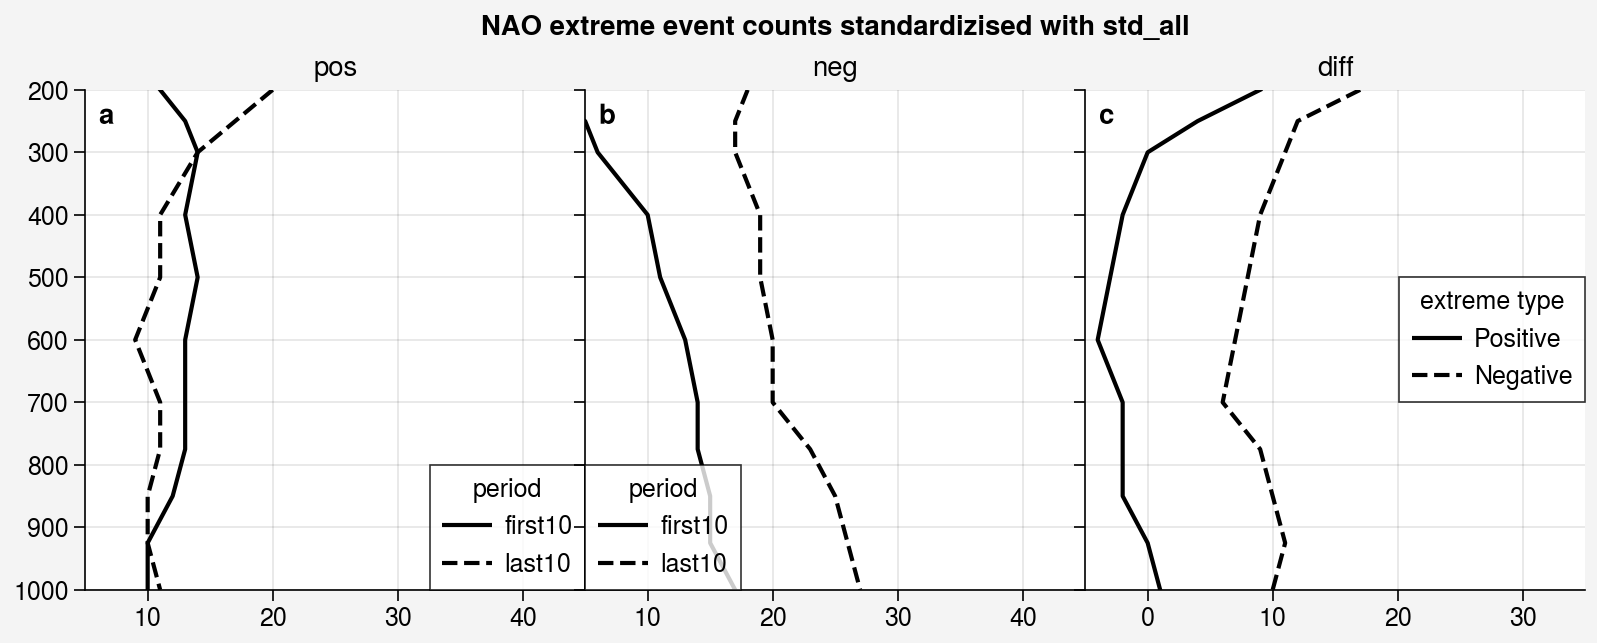

In [15]:
plot_vertical_profile(first_all_ec, last_all_ec,'NAO','std_all')

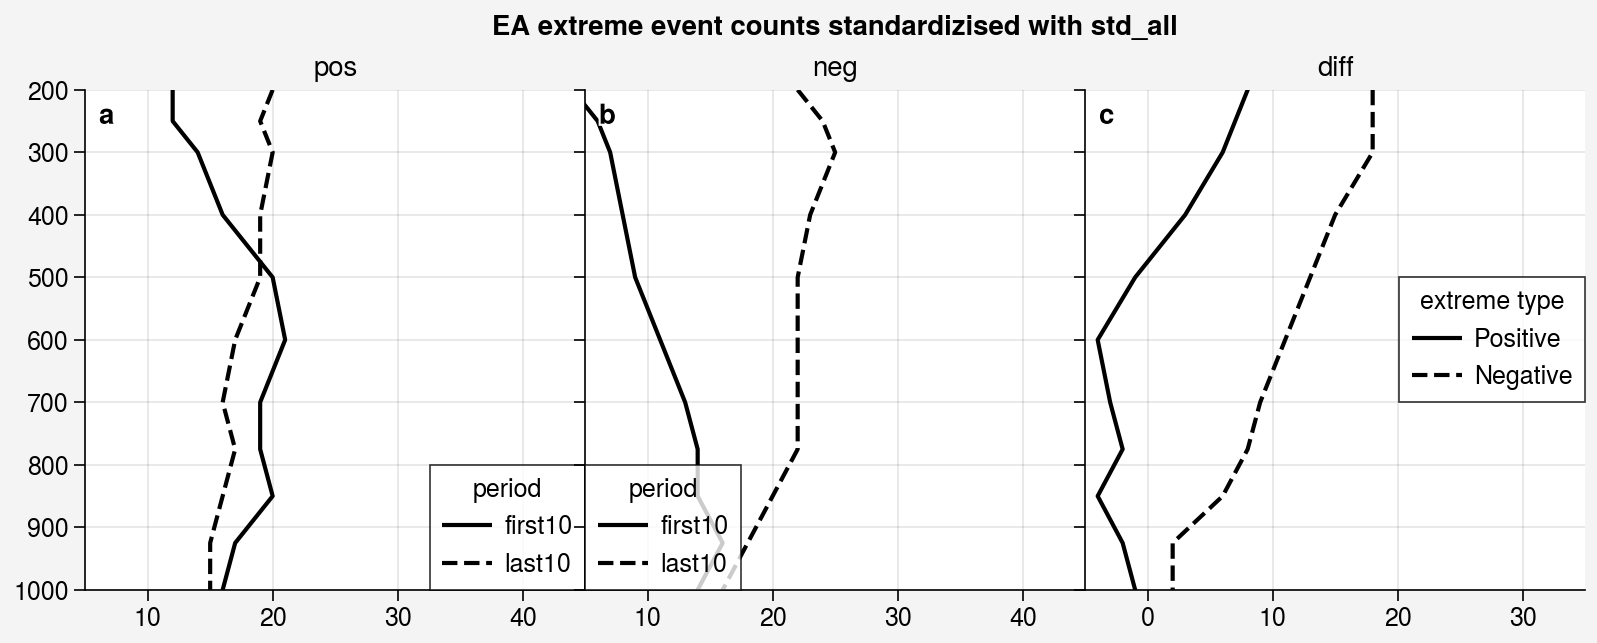

In [16]:
plot_vertical_profile(first_all_ec, last_all_ec,'EA','std_all')